In [ ]:
## Importing Libraries

import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook
%matplotlib inline
from sklearn.linear_model import LogisticRegression
import sklearn.model_selection
import sklearn.preprocessing as preproc
from sklearn.feature_extraction import text
import pickle
import warnings
warnings.filterwarnings("ignore")

In [ ]:
del df

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Final_Dataset_V2.xlsx to Final_Dataset_V2.xlsx


In [ ]:
# Load data : please update the dataset name and sheet name
df = pd.read_excel('Final_Dataset_V2.xlsx', sheet_name='Sheet1')

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Remove missing data
df.dropna(subset=['review'], inplace=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['rating'], test_size=0.2, random_state=42)

# Create a pipeline for logistic regression model
lr_pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', LogisticRegression(random_state=42))
])

# Train the model
lr_pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr_pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


cm = confusion_matrix(y_test, y_pred)
print(cm)


Accuracy: 0.5593333333333333
[[373 148  48  23   7]
 [163 308  91  40  15]
 [ 58 138 232 116  33]
 [ 20  37 124 311 124]
 [  7  16  23  91 454]]


In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.60      0.62      0.61       599
           2       0.48      0.50      0.49       617
           3       0.45      0.40      0.42       577
           4       0.54      0.50      0.52       616
           5       0.72      0.77      0.74       591

    accuracy                           0.56      3000
   macro avg       0.56      0.56      0.56      3000
weighted avg       0.56      0.56      0.56      3000



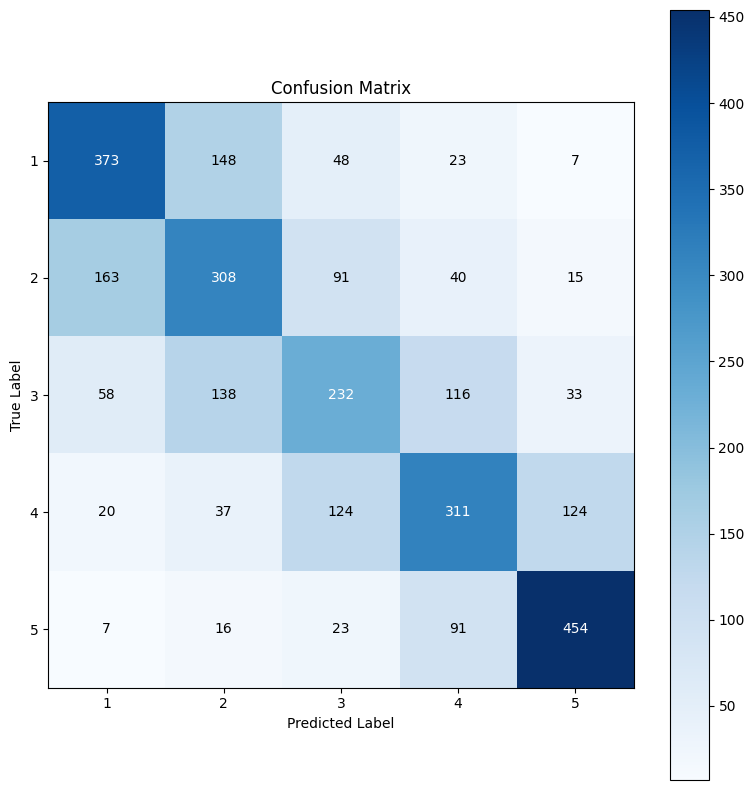

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(cm, cmap=plt.cm.Blues)
ax.set_title('Confusion Matrix')
plt.colorbar(im)
tick_marks = np.arange(len(set(y_test)))
plt.xticks(tick_marks, sorted(set(y_test)))
plt.yticks(tick_marks, sorted(set(y_test)))

# Add text annotations inside the plot
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
fig.tight_layout()
plt.show()